In [41]:
import os
import math
import random
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from collections import Counter

import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

import ngrams
import mcmc

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\yaoda\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\yaoda\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [2]:
file_path = os.path.join(os.getcwd(), '..', 'data', 'pg2554.txt')

df_char_1 = ngrams.load_ngrams(file_path, 'char', 1)
df_char_2 = ngrams.load_ngrams(file_path, 'char', 2)

df_word_1 = ngrams.load_ngrams(file_path, 'word', 1)
df_word_2 = ngrams.load_ngrams(file_path, 'word', 2)

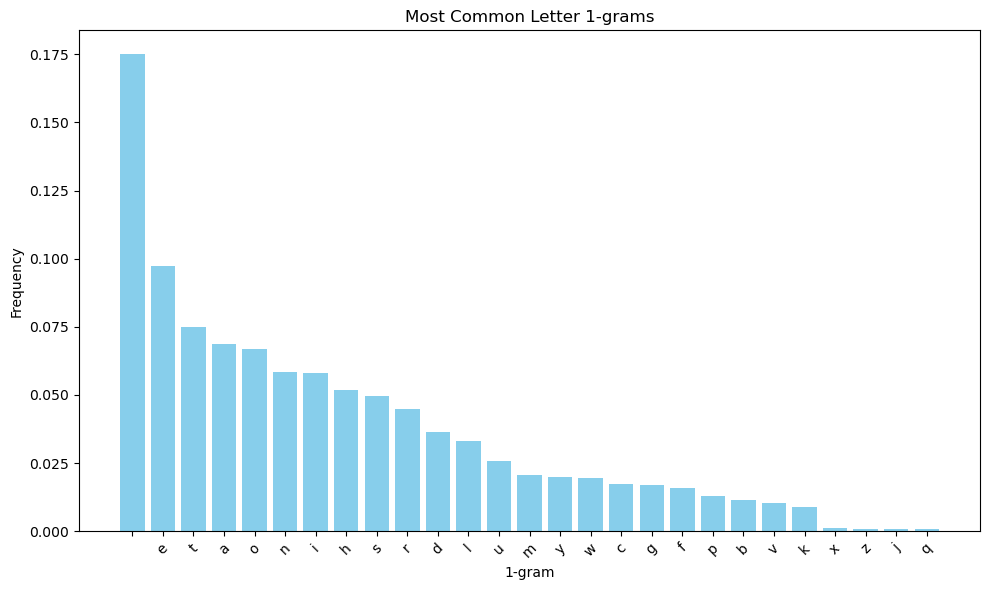

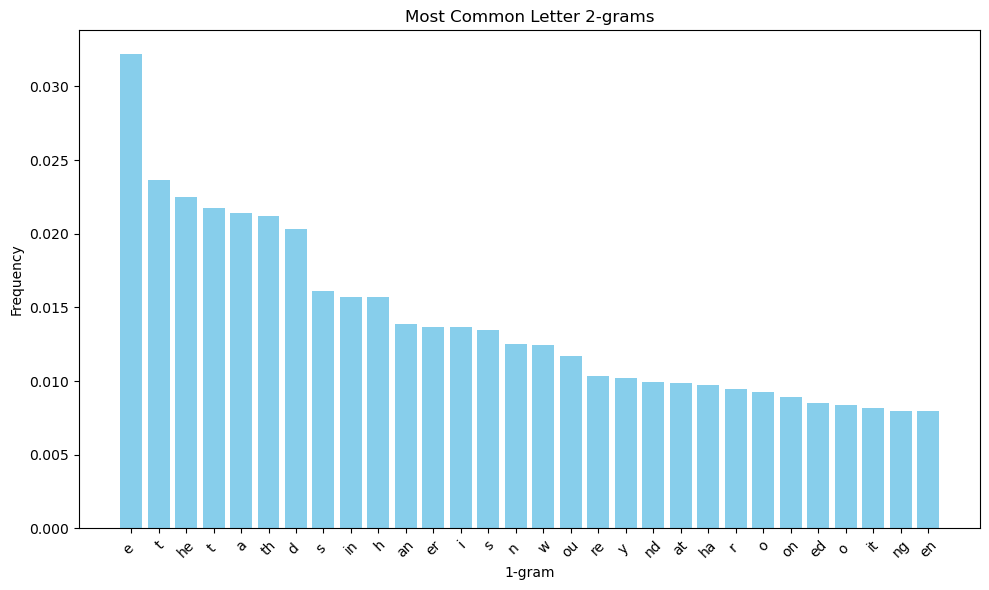

In [3]:
df_char_1_top = df_char_1.head(30)

plt.figure(figsize=(10,6))
plt.bar(df_char_1_top['1-gram'], df_char_1_top['frequency'], color='skyblue')
plt.xlabel("1-gram")
plt.ylabel("Frequency")
plt.title("Most Common Letter 1-grams")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

df_char_2_top = df_char_2.head(30)

plt.figure(figsize=(10,6))
plt.bar(df_char_2_top['2-gram'], df_char_2_top['frequency'], color='skyblue')
plt.xlabel("1-gram")
plt.ylabel("Frequency")
plt.title("Most Common Letter 2-grams")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

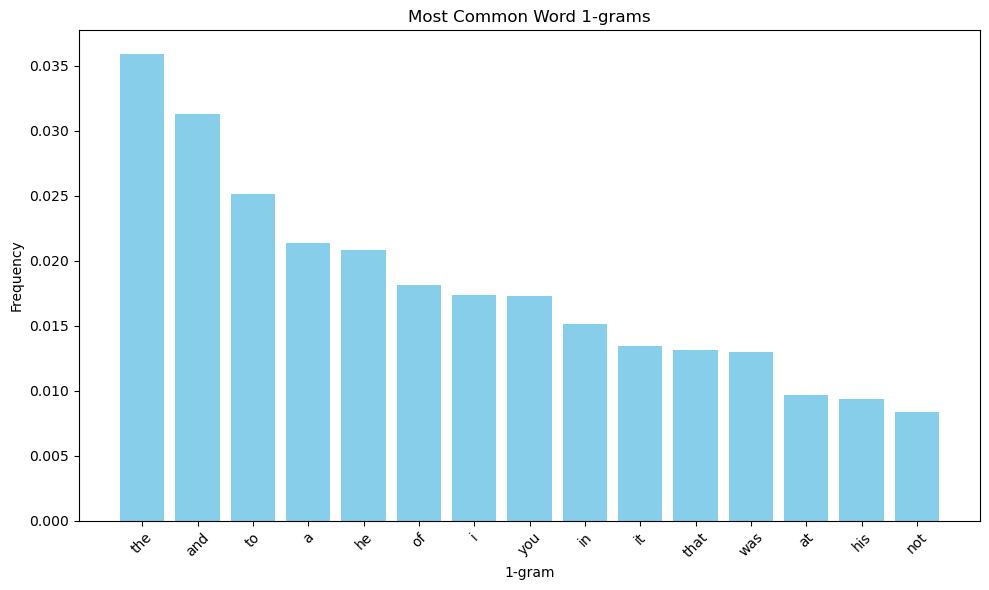

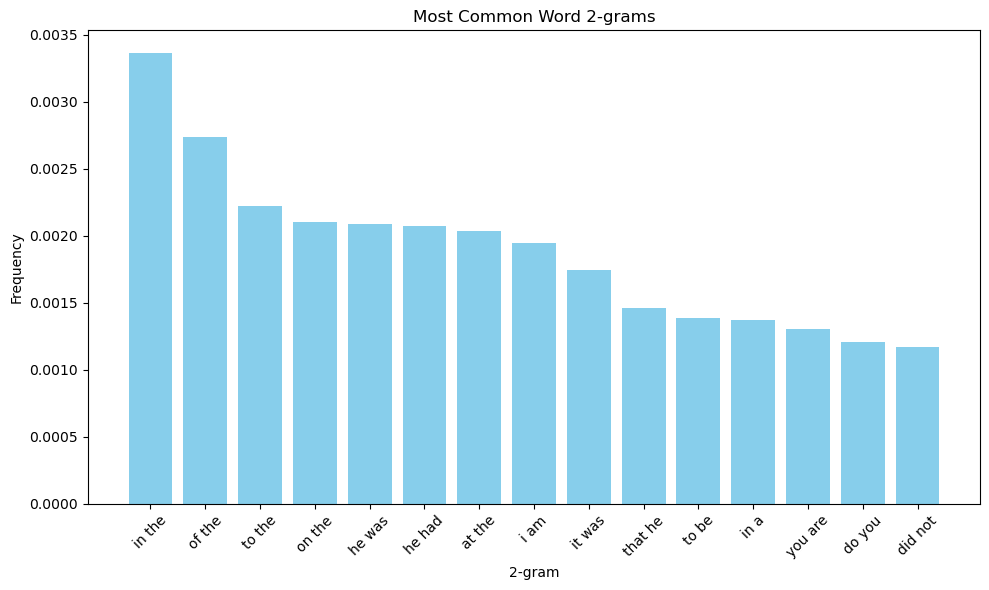

In [4]:
df_word_1_top = df_word_1.head(15).copy()
df_word_1_top.loc[:, '1-gram'] = df_word_1_top['1-gram'].apply(lambda x: ' '.join(x) if isinstance(x, tuple) else x).str.lower()

plt.figure(figsize=(10,6))
plt.bar(df_word_1_top['1-gram'], df_word_1_top['frequency'], color='skyblue')
plt.xlabel("1-gram")
plt.ylabel("Frequency")
plt.title("Most Common Word 1-grams")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

df_word_2_top = df_word_2.head(15).copy()
df_word_2_top.loc[:, '2-gram'] = df_word_2_top['2-gram'].apply(lambda x: ' '.join(x) if isinstance(x, tuple) else x).str.lower()

plt.figure(figsize=(10,6))
plt.bar(df_word_2_top['2-gram'], df_word_2_top['frequency'], color='skyblue')
plt.xlabel("2-gram")
plt.ylabel("Frequency")
plt.title("Most Common Word 2-grams")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [5]:
df_char_3 = ngrams.load_ngrams(file_path, 'char', 5)
text1 = ngrams.generate_text(df_char_3, 'char', 5, 100)
print(text1)

df_word_3 = ngrams.load_ngrams(file_path, 'word', 3)
text2 = ngrams.generate_text(df_word_3, 'word', 3, 30)
print(text2)

100%|██████████| 95/95 [00:02<00:00, 35.96it/s]


sonsolenka crackther facei dont worrificer withtheyou have forgot have children koch possimov had re


100%|██████████| 27/27 [00:01<00:00, 22.88it/s]

a cold and damp penetrated his whole chest is weak and she is rather deaf has shegone out where did i rave abouthow he keeps on are you starting soon


In [10]:
P = {row['1-gram']: row['frequency'] for _, row in df_char_1.iterrows()}
Q = {tuple(row['2-gram']): row['frequency'] for _, row in df_char_2.iterrows()}

alphabet = list("abcdefghijklmnopqrstuvwxyz ")
permutation = alphabet.copy()
random.shuffle(permutation)

sigma = {k: v for k, v in zip(alphabet, permutation)}

# text = "It was the best of times, it was the worst of times, it was the age of wisdom, it was the age of foolishness, it was the epoch of belief, it was the epoch of incredulity, it was the season of Light, it was the season of Darkness, it was the spring of hope, it was the winter of despair, we had everything before us, we had nothing before us, we were all going direct to Heaven, we were all going direct the other way—in short, the period was so far like the present period, that some of its noisiest authorities insisted on its being received, for good or for evil, in the superlative degree of comparison only."

text = "Four score and seven years ago our fathers brought forth on this continent, a new nation, conceived in Liberty, and dedicated to the proposition that all men are created equal. Now we are engaged in a great civil war, testing whether that nation, or any nation so conceived and so dedicated, can long endure. We are met on a great battle-field of that war. We have come to dedicate a portion of that field, as a final resting place for those who here gave their lives that that nation might live. It is altogether fitting and proper that we should do this. But, in a larger sense, we can not dedicate—we can not consecrate—we can not hallow—this ground. The brave men, living and dead, who struggled here, have consecrated it, far above our poor power to add or detract. The world will little note, nor long remember what we say here, but it can never forget what they did here. It is for us the living, rather, to be dedicated here to the unfinished work which they who fought here have thus far so nobly advanced. It is rather for us to be here dedicated to the great task remaining before us—that from these honored dead we take increased devotion to that cause for which they gave the last full measure of devotion—that we here highly resolve that these dead shall not have died in vain—that this nation, under God, shall have a new birth of freedom—and that government of the people, by the people, for the people, shall not perish from the earth."

alphabet = set(alphabet)
text = text.lower()
text = "".join(a for a in text if a in alphabet)

scrambled_text = "".join([sigma.get(symbol, symbol) for symbol in text])

state_chain, energy_chain, best_perm, best_energy = mcmc.metropolis_hastings(scrambled_text, P, Q, beta=0.5, n=10**5, perm=None, return_chain=True)

best_perm = mcmc.inv_perm(best_perm)
decoded_text = "".join([best_perm.get(symbol, symbol) for symbol in scrambled_text])

print(f"Scrambled text: \n{scrambled_text}\n")
print(f"Best energy: \n{best_energy}\n")
print(f"Decoded text: \n{decoded_text}")
print(f"Decoded: \n{decoded_text == text}")

100%|██████████| 110000/110000 [00:11<00:00, 9878.84it/s] 

Scrambled text: 
lv dojivdrogtsojrbrtokrgdjogqvov dolgenrdjofdv qneolvdenovtoenxjoivtextrteogotruotgexvtoivtirxbrsoxtomxfrdekogtsosrsxigersoevoenroydvyvjxexvtoengeogmmozrtogdroidrgersorh gmotvuourogdrortqgqrsoxtogoqdrgeoixbxmougdoerjextqounrenrdoengeotgexvtovdogtkotgexvtojvoivtirxbrsogtsojvosrsxigersoigtomvtqorts drourogdrozreovtogoqdrgeofgeemrlxrmsovloengeougdourongbroivzroevosrsxigerogoyvdexvtovloengeolxrmsogjogolxtgmodrjextqoymgirolvdoenvjrounvonrdroqgbroenrxdomxbrjoengeoengeotgexvtozxqneomxbroxeoxjogmevqrenrdolxeextqogtsoydvyrdoengeourojnv msosvoenxjof eoxtogomgdqrdojrtjrouroigtotveosrsxigeruroigtotveoivtjridgeruroigtotveongmmvuenxjoqdv tsoenrofdgbrozrtomxbxtqogtsosrgsounvojed qqmrsonrdrongbroivtjridgersoxeolgdogfvbrov doyvvdoyvurdoevogssovdosredgieoenrouvdmsouxmmomxeemrotverotvdomvtqodrzrzfrdoungeourojgkonrdrof eoxeoigtotrbrdolvdqreoungeoenrkosxsonrdroxeoxjolvdo joenromxbxtqodgenrdoevofrosrsxigersonrdroevoenro tlxtxjnrsouvdpounxinoenrkounvolv qneonrdrongbroen jolgdojvotvfmkogsbgti

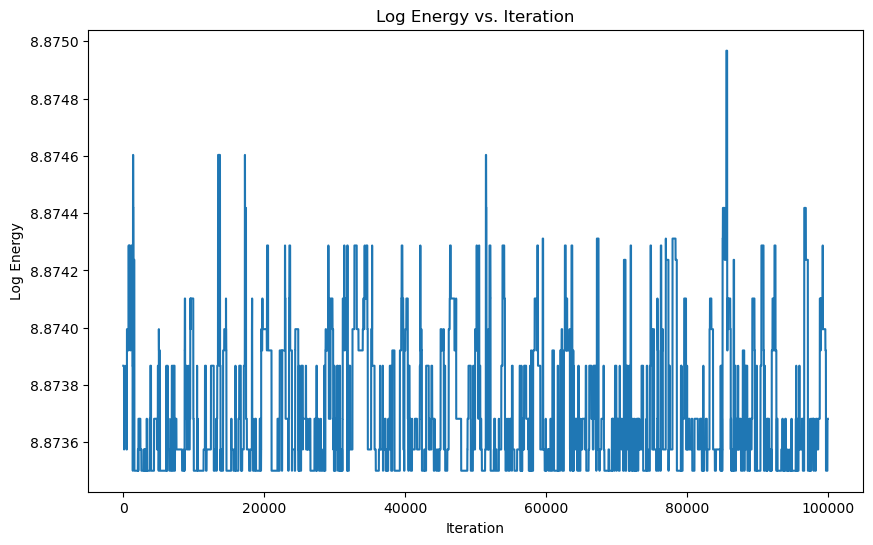

In [11]:
energy_chain = np.array(energy_chain)
energy_chain = np.log(energy_chain)

plt.figure(figsize=(10, 6))
plt.plot(energy_chain)
plt.xlabel("Iteration")
plt.ylabel("Log Energy")
plt.title("Log Energy vs. Iteration")
plt.show()

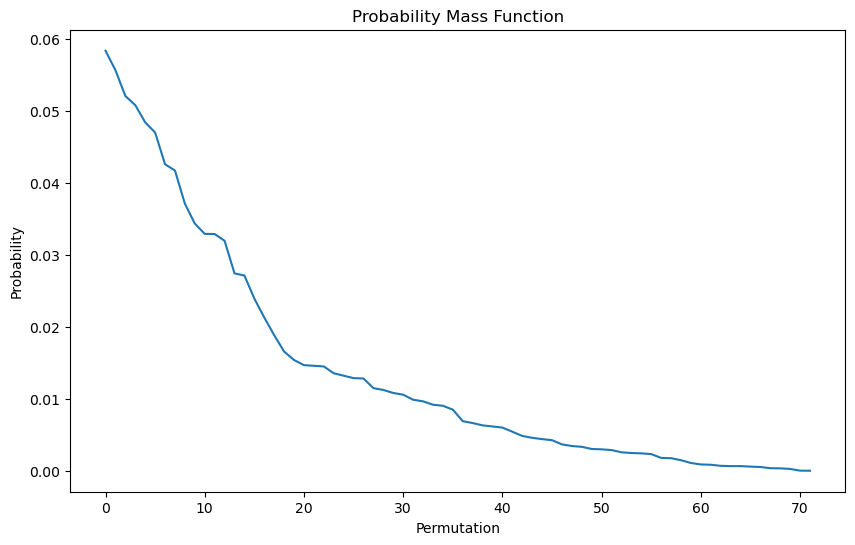

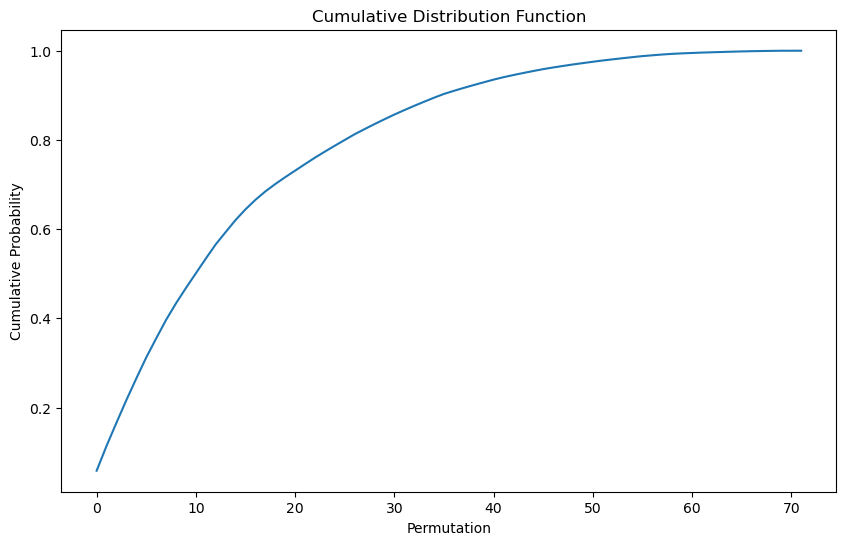

In [12]:
pmf = []
cdf = []

count = Counter([tuple(perm.items()) for perm in state_chain])
count = count.most_common(len(count))

for _, cnt in count:
    pmf.append(cnt / len(state_chain))
    cdf.append(sum(pmf))

plt.figure(figsize=(10, 6))
plt.plot(range(len(count)), pmf)
plt.xlabel("Permutation")
plt.ylabel("Probability")
plt.title("Probability Mass Function")
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(range(len(count)), cdf)
plt.xlabel("Permutation")
plt.ylabel("Cumulative Probability")
plt.title("Cumulative Distribution Function")
plt.show()

In [9]:
# print(decoded_text == text)

# for perm, _ in count:
#     perm = mcmc.inv_perm(dict(perm))
#     decoded_text = "".join([perm.get(symbol, symbol) for symbol in scrambled_text])
#     print(f"Decoded text: \n{decoded_text}\n")

In [26]:
def vigenere_cipher(text, key):
    """
    Encrypts a text using the Vigenere cipher.

    Parameters:
        text (str): The text to encrypt.
        key (str): The key to use for encryption.
    
    Returns:
        str: The encrypted text.
    """
    alphabet = list("abcdefghijklmnopqrstuvwxyz ")
    sigma = np.ndarray(len(key), dtype=dict)

    for i, char in enumerate(key):
        j = alphabet.index(char)
        sigma[i] = {k: v for k, v in zip(alphabet, alphabet[j:] + alphabet[:j])}

    cipher = np.zeros(len(text), dtype=str)
    
    for i, char in enumerate(text):
        cipher[i] = sigma[i % len(key)].get(char)

    return "".join(cipher)

def vigenere_decipher(text, key):
    """
    Decrypts a text using the Vigenere cipher.

    Parameters:
        text (str): The text to decrypt.
        key (str): The key to use for decryption.
    
    Returns:
        str: The decrypted text.
    """
    alphabet = list("abcdefghijklmnopqrstuvwxyz ")
    sigma = np.ndarray(len(key), dtype=dict)

    for i, char in enumerate(key):
        j = len(alphabet) - alphabet.index(char)
        sigma[i] = {k: v for k, v in zip(alphabet, alphabet[j:] + alphabet[:j])}

    decipher = np.zeros(len(text), dtype=str)
    
    for i, char in enumerate(text):
        decipher[i] = sigma[i % len(key)].get(char)

    return "".join(decipher)

In [25]:
text = "hello world"
key = "ab"
encoded_text = vigenere_cipher(text, key)
decoded_text = vigenere_decipher(encoded_text, key)

print(f"Text: {text}")
print(f"Key: {key}")
print(f"Encoded text: {encoded_text}")
print(f"Decoded text: {decoded_text}")
print(f"Decoded: {decoded_text == text}")

Text: hello world
Key: ab
Encoded text: hflmoawprmd
Decoded text: hello world
Decoded: True


In [44]:
def energy_function(decoded_text, P, Q):
    """
    Computes the energy of a permutation given a scrambled text and n-gram probabilities.

    Parameters:
        perm (dict): The permutation to evaluate.
        scrambled_text (str): The scrambled text.
        P (dict): The unigram probabilities.
        Q (dict): The bigram probabilities.

    Returns:
        float: The energy of the permutation.
    """
    epsilon = 1e-12
    energy = -math.log(P.get(decoded_text[0], epsilon))

    for j in range(len(decoded_text) - 1):
        bigram = (decoded_text[j], decoded_text[j+1])
        energy = energy - math.log(Q.get(bigram, epsilon))
    
    return energy

def propose_key(key):
    """
    Proposes a new key by randomly changing a character in the current key.

    Parameters:
        key (str): The current key.

    Returns:
        str: The proposed key.
    """
    alphabet = list("abcdefghijklmnopqrstuvwxyz ")
    key = list(key)
    i = random.randint(0, len(key) - 1)
    j = random.randint(0, len(alphabet) - 1)
    key[i] = alphabet[j]

    return "".join(key)

def metropolis_step(key, scrambled_text, P, Q, beta=1, old_energy=math.inf, old_keys=dict()):
    """
    Performs a single step of the Metropolis-Hastings algorithm.

    Parameters:
        key (str): The current key.
        scrambled_text (str): The scrambled text.
        P (dict): The unigram probabilities.
        Q (dict): The bigram probabilities.
        beta (float): The inverse temperature. Default is 1.
        old_energy (float): The energy of the current deciphered text. Default is infinity.
        old_keys (dict): The previously visited keys. Default is an empty dictionary.

    Returns:
        str: The new key.
        float: The energy of the new deciphered test.
        dict: The updated dictionary of previously visited keys.
    """
    new_key = propose_key(key)
    
    if new_key in old_keys:
        new_energy = old_keys[new_key]
    else:
        new_energy = energy_function(vigenere_decipher(scrambled_text, new_key), P, Q)
        old_keys[new_key] = new_energy

    E_delta = new_energy - old_energy

    if E_delta < 0 or random.random() < math.exp(-beta * E_delta):
        return new_key, new_energy, old_keys
    
    return key, old_energy, old_keys

def metropolis_hastings(scrambled_text, P, Q, key_length, key=None, beta=1, n=10**5, return_chain=False):
    """
    Runs the Metropolis-Hastings algorithm to decode a scrambled text.

    Parameters:
        scrambled_text (str): The scrambled text.
        P (dict): The unigram probabilities.
        Q (dict): The bigram probabilities.
        key_length (int): The length of the key.
        key (str): The initial key. Default is None (which becomes identity).
        beta (float): The inverse temperature. Default is 1.
        n (int): The length of the chain to be returned. Default is 1e5.
        return_chain (bool): Whether to return the chain. Default is False.
    
    Returns:
        list: The chain of keys.
        list: The chain of energies.
        dict: The best key found.
        float: The energy of the best key.
    """
    if key is None:
        key = "a" * key_length

    energy = math.inf
    old_keys = dict()

    best_key = key
    best_energy = energy

    if return_chain:
        state_chain = []
        energy_chain = []

        for _ in tqdm(range(n+10**4)):
            key, energy, old_keys = metropolis_step(key, scrambled_text, P, Q, beta, energy, old_keys)
            state_chain.append(key)
            energy_chain.append(energy)

            if energy < best_energy:
                best_key = key
                best_energy = energy
        
        return state_chain[10**4:], energy_chain[10**4:], best_key, best_energy

    for _ in tqdm(range(n+10**4)):
        key, energy, old_keys= metropolis_step(key, scrambled_text, P, Q, beta, energy, old_keys)

        if energy < best_energy:
            best_key = key
            best_energy = energy
    
    return None, None, best_key, best_energy

In [54]:
P = {row['1-gram']: row['frequency'] for _, row in df_char_1.iterrows()}
Q = {tuple(row['2-gram']): row['frequency'] for _, row in df_char_2.iterrows()}

text = "Four score and seven years ago our fathers brought forth on this continent, a new nation, conceived in Liberty, and dedicated to the proposition that all men are created equal. Now we are engaged in a great civil war, testing whether that nation, or any nation so conceived and so dedicated, can long endure. We are met on a great battle-field of that war. We have come to dedicate a portion of that field, as a final resting place for those who here gave their lives that that nation might live. It is altogether fitting and proper that we should do this. But, in a larger sense, we can not dedicate—we can not consecrate—we can not hallow—this ground. The brave men, living and dead, who struggled here, have consecrated it, far above our poor power to add or detract. The world will little note, nor long remember what we say here, but it can never forget what they did here. It is for us the living, rather, to be dedicated here to the unfinished work which they who fought here have thus far so nobly advanced. It is rather for us to be here dedicated to the great task remaining before us—that from these honored dead we take increased devotion to that cause for which they gave the last full measure of devotion—that we here highly resolve that these dead shall not have died in vain—that this nation, under God, shall have a new birth of freedom—and that government of the people, by the people, for the people, shall not perish from the earth."
text = text.lower()
text = "".join(a for a in text if a in alphabet)
key = "directed reading program"
encoded_text = vigenere_cipher(text, key)

state_chain, energy_chain, best_key, best_energy = metropolis_hastings(encoded_text, P, Q, len(key), None, beta=0.5, n=10**5, return_chain=True)

decoded_text = vigenere_decipher(encoded_text, best_key)

print(f"Text: {text}")
print(f"Key: {key}")
print(f"Encoded text: {encoded_text}")
print(f"Best key: {best_key}")
print(f"Best energy: {best_energy}")
print(f"Decoded text: {decoded_text}")
print(f"Decoded: {decoded_text == text}")

100%|██████████| 110000/110000 [00:03<00:00, 30540.22it/s]

Text: four score and seven years ago our fathers brought forth on this continent a new nation conceived in liberty and dedicated to the proposition that all men are created equal now we are engaged in a great civil war testing whether that nation or any nation so conceived and so dedicated can long endure we are met on a great battlefield of that war we have come to dedicate a portion of that field as a final resting place for those who here gave their lives that that nation might live it is altogether fitting and proper that we should do this but in a larger sense we can not dedicatewe can not consecratewe can not hallowthis ground the brave men living and dead who struggled here have consecrated it far above our poor power to add or detract the world will little note nor long remember what we say here but it can never forget what they did here it is for us the living rather to be dedicated here to the unfinished work which they who fought here have thus far so nobly advanced it is ra